IMPORTING PACKAGES 

In [764]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Binarizer
from matplotlib import style

READING DATASET and CREATING THE DATA FRAME

In [765]:
data=pd.read_csv(r"C:\Users\KIIT\Desktop\1828188.csv")
df=pd.DataFrame(data)

In [766]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR us,2019-05-15 00:00:00,2019.0,1.929261e+09,2019-05-05,20190505,20190505,20190520.0,USD,RV,1.0,NaN,6532.60,20190505.0,NAH4,1.929261e+09,0
1,U001,0200769623,WAL-MAR,2019-10-22 00:00:00,2019.0,1.929996e+09,2019-10-12,20191010,20191012,20191027.0,USD,RV,1.0,NaN,9890.75,20191012.0,NAH4,1.929996e+09,0
2,CA02,0140104429,COSTCO foundation,2019-04-04 00:00:00,2019.0,2.960536e+09,2019-03-23,20190323,20190323,20190403.0,CAD,RV,1.0,NaN,73059.22,20190324.0,CA10,2.960536e+09,0
3,U001,0200769623,WAL-MAR corp,2019-12-10 00:00:00,2019.0,1.930203e+09,2019-11-27,20191127,20191127,20191212.0,USD,RV,1.0,NaN,12219.74,20191127.0,NAH4,1.930203e+09,0
4,U001,0200769623,WAL-MAR corp,2019-07-08 00:00:00,2019.0,1.929540e+09,2019-06-27,20190625,20190627,20190712.0,USD,RV,1.0,NaN,1897.50,20190627.0,NAH4,1.929540e+09,0


In [767]:
df.shape

(50000, 19)

In [768]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999300e+04,50000.000000
mean,2019.188980,2.012941e+09,2.019236e+07,2.019239e+07,2.019255e+07,1.0,NaN,32470.811970,2.019239e+07,2.011893e+09,0.064940
std,0.391497,2.913356e+08,3.787563e+03,3.777712e+03,3.799784e+03,0.0,NaN,40465.220479,3.779060e+03,2.775574e+08,0.246422
min,2019.000000,1.928497e+09,2.018123e+07,2.018120e+07,2.018080e+07,1.0,NaN,0.700000,2.018072e+07,1.928497e+09,0.000000
25%,2019.000000,1.929220e+09,2.019042e+07,2.019042e+07,2.019051e+07,1.0,NaN,4718.797500,2.019042e+07,1.929220e+09,0.000000
50%,2019.000000,1.929791e+09,2.019080e+07,2.019080e+07,2.019082e+07,1.0,NaN,17423.915000,2.019080e+07,1.929791e+09,0.000000
75%,2019.000000,1.930370e+09,2.019112e+07,2.019112e+07,2.019121e+07,1.0,NaN,47019.780000,2.019112e+07,1.930369e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020062e+07,1.0,NaN,860880.000000,2.020052e+07,2.960635e+09,1.000000


In [769]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 3247
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    7
isOpen                        0
dtype: int64

DELETING unnecessary columns and row(Generic Method)

In [770]:
#dropping all coloumn whose all values are null

In [771]:
df.dropna(how='all',axis=1,inplace=True)

In [772]:
#dropping all rows whose all values are null

In [773]:
df.dropna(how='all',axis=0,inplace=True)

In [774]:
df.shape

(50000, 18)

In [775]:
df.isnull().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                3247
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
posting_id                   0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   7
isOpen                       0
dtype: int64

Dropping invoice_id column

In [776]:
df.drop(columns=['invoice_id'],inplace=True)

In [777]:
df.isnull().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                3247
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
posting_id                   0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
isOpen                       0
dtype: int64

Now my dataframe is free from null values except clear_date column

In [778]:
df['document type'].unique()

array(['RV', 'X2'], dtype=object)

Changing values of document type column from string to binary values

In [779]:
df["document type"].replace({"RV": 1, "X2": 0 }, inplace=True)

In [780]:
df['document type'].value_counts()

1    49993
0        7
Name: document type, dtype: int64

I am considering USD as the general currency and hence converting the value of the total_open amount to USD (some of)which are in CAD

In [781]:
from forex_python.converter import CurrencyRates

In [782]:
df['invoice_currency'].unique()

array(['USD', 'CAD'], dtype=object)

In [783]:
c=CurrencyRates()

In [784]:
rate=c.get_rate('USD','CAD')

In [785]:
rate

1.2788398154

In [786]:
df['total_open_amount'].loc[(df['invoice_currency'] == 'CAD')] = df['total_open_amount']/rate

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [787]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200769623,WAL-MAR us,2019-05-15 00:00:00,2019.0,1.929261e+09,2019-05-05,20190505,20190505,20190520.0,USD,1,1.0,6532.60000,20190505.0,NAH4,0
1,U001,0200769623,WAL-MAR,2019-10-22 00:00:00,2019.0,1.929996e+09,2019-10-12,20191010,20191012,20191027.0,USD,1,1.0,9890.75000,20191012.0,NAH4,0
2,CA02,0140104429,COSTCO foundation,2019-04-04 00:00:00,2019.0,2.960536e+09,2019-03-23,20190323,20190323,20190403.0,CAD,1,1.0,57129.29729,20190324.0,CA10,0
3,U001,0200769623,WAL-MAR corp,2019-12-10 00:00:00,2019.0,1.930203e+09,2019-11-27,20191127,20191127,20191212.0,USD,1,1.0,12219.74000,20191127.0,NAH4,0
4,U001,0200769623,WAL-MAR corp,2019-07-08 00:00:00,2019.0,1.929540e+09,2019-06-27,20190625,20190627,20190712.0,USD,1,1.0,1897.50000,20190627.0,NAH4,0


Changing invoice_currency column name to region

In [788]:
df=df.rename(columns={"invoice_currency": "Region"})

In [789]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,Region,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200769623,WAL-MAR us,2019-05-15 00:00:00,2019.0,1.929261e+09,2019-05-05,20190505,20190505,20190520.0,USD,1,1.0,6532.60000,20190505.0,NAH4,0
1,U001,0200769623,WAL-MAR,2019-10-22 00:00:00,2019.0,1.929996e+09,2019-10-12,20191010,20191012,20191027.0,USD,1,1.0,9890.75000,20191012.0,NAH4,0
2,CA02,0140104429,COSTCO foundation,2019-04-04 00:00:00,2019.0,2.960536e+09,2019-03-23,20190323,20190323,20190403.0,CAD,1,1.0,57129.29729,20190324.0,CA10,0
3,U001,0200769623,WAL-MAR corp,2019-12-10 00:00:00,2019.0,1.930203e+09,2019-11-27,20191127,20191127,20191212.0,USD,1,1.0,12219.74000,20191127.0,NAH4,0
4,U001,0200769623,WAL-MAR corp,2019-07-08 00:00:00,2019.0,1.929540e+09,2019-06-27,20190625,20190627,20190712.0,USD,1,1.0,1897.50000,20190627.0,NAH4,0


Changing values of Region (Previously invoice_currency) column from string to binary values

In [790]:
df["Region"].replace({"USD": 1, "CAD": 0 }, inplace=True)

In [791]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,Region,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200769623,WAL-MAR us,2019-05-15 00:00:00,2019.0,1.929261e+09,2019-05-05,20190505,20190505,20190520.0,1,1,1.0,6532.60000,20190505.0,NAH4,0
1,U001,0200769623,WAL-MAR,2019-10-22 00:00:00,2019.0,1.929996e+09,2019-10-12,20191010,20191012,20191027.0,1,1,1.0,9890.75000,20191012.0,NAH4,0
2,CA02,0140104429,COSTCO foundation,2019-04-04 00:00:00,2019.0,2.960536e+09,2019-03-23,20190323,20190323,20190403.0,0,1,1.0,57129.29729,20190324.0,CA10,0
3,U001,0200769623,WAL-MAR corp,2019-12-10 00:00:00,2019.0,1.930203e+09,2019-11-27,20191127,20191127,20191212.0,1,1,1.0,12219.74000,20191127.0,NAH4,0
4,U001,0200769623,WAL-MAR corp,2019-07-08 00:00:00,2019.0,1.929540e+09,2019-06-27,20190625,20190627,20190712.0,1,1,1.0,1897.50000,20190627.0,NAH4,0


Checking type of unique values in posting_id column

In [792]:
df.posting_id.value_counts()

1.0    50000
Name: posting_id, dtype: int64

As all the values are same I am dropping this column

In [793]:
df.drop(columns=['posting_id'],inplace=True)

In [794]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,Region,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200769623,WAL-MAR us,2019-05-15 00:00:00,2019.0,1.929261e+09,2019-05-05,20190505,20190505,20190520.0,1,1,6532.60000,20190505.0,NAH4,0
1,U001,0200769623,WAL-MAR,2019-10-22 00:00:00,2019.0,1.929996e+09,2019-10-12,20191010,20191012,20191027.0,1,1,9890.75000,20191012.0,NAH4,0
2,CA02,0140104429,COSTCO foundation,2019-04-04 00:00:00,2019.0,2.960536e+09,2019-03-23,20190323,20190323,20190403.0,0,1,57129.29729,20190324.0,CA10,0
3,U001,0200769623,WAL-MAR corp,2019-12-10 00:00:00,2019.0,1.930203e+09,2019-11-27,20191127,20191127,20191212.0,1,1,12219.74000,20191127.0,NAH4,0
4,U001,0200769623,WAL-MAR corp,2019-07-08 00:00:00,2019.0,1.929540e+09,2019-06-27,20190625,20190627,20190712.0,1,1,1897.50000,20190627.0,NAH4,0


In [795]:
df.shape

(50000, 16)

Checking the datatype of clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,baseline_create_date

In [796]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              46753 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  Region                  50000 non-null  int64  
 11  document type           50000 non-null  int64  
 12  total_open_amount       50000 non-null  float64
 13  baseline_create_date    50000 non-null  float64
 14  cust_payment_terms      50000 non-null

Converting datatype of clear_date to datatime

In [797]:
df['clear_date']=pd.to_datetime(df.clear_date)

Converting datatype of posting_date to datatime

In [798]:
df['posting_date']=pd.to_datetime(df.posting_date)

Converting datatype of document_create_date to datatime

In [799]:
df['document_create_date'] = pd.to_datetime(df['document_create_date'].astype(str), format='%Y%m%d')

Converting datatype of document_create_date.1 to datatime

In [800]:
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'].astype(str), format='%Y%m%d')

Converting datatype of due_in_date to datatime

In [801]:
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')

Converting datatype of baseline_create_date to datatime

In [802]:
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')

In [803]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              46753 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  Region                  50000 non-null  int64         
 11  document type           50000 non-null  int64         
 12  total_open_amount       50000 non-null  float6

Checking if there is an anamoly between clear_date and document_create_date

In [804]:
df.index[df.clear_date < df.document_create_date]

Int64Index([], dtype='int64')

No anomaly found between clear_date and document_create_date

Checking if there is an anamoly between clear_date and document_create_date.1

In [805]:
df.index[df['clear_date'] < df['document_create_date.1']]

Int64Index([], dtype='int64')

No anomaly found between clear_date and document_create_date.1

Checking if there is an anamoly between clear_date and posting_date

In [806]:
df.index[df.clear_date < df.posting_date]

Int64Index([], dtype='int64')

No anomaly found between clear_date and posting_date

Checking if there is an anamoly between clear_date and baseline_create_date

In [807]:
df.index[df.clear_date < df.baseline_create_date]

Int64Index([17159, 42656], dtype='int64')

In this case there are 2 anamolies found

In [808]:
df.drop(df.index[df.clear_date < df.baseline_create_date], inplace=True)

In [809]:
df.index[df.clear_date < df.baseline_create_date]

Int64Index([], dtype='int64')

Now it is anamoly free as I have dropped these two rows

Checking if there is an anamoly between due_in_date and posting_date

In [810]:
df.index[df.due_in_date < df.posting_date]

Int64Index([   25,   490,   655,   685,  1076,  1424,  1672,  2179,  2267,
             2520,
            ...
            47687, 48429, 48765, 48824, 48957, 49009, 49125, 49558, 49722,
            49868],
           dtype='int64', length=144)

In [811]:
df.drop(df.index[df.due_in_date < df.posting_date], inplace=True)

In [812]:
df.index[df.due_in_date < df.posting_date]

Int64Index([], dtype='int64')

Anamoly removed

Making a Delay Column and Calculating Delay|delay=clear_date-due_in_date

In [813]:
df['delay']=df['clear_date']-df['due_in_date']

In [814]:
df.delay.dtype

dtype('<m8[ns]')

In [815]:
df['delay']=df['delay'].dt.days

In [816]:
df['delay'].isnull().values.any()

True

Converting Negative Delays to 0

In [817]:
df['delay'].loc[(df['delay'] < 0)] = 0

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [818]:
df.delay.value_counts()

0.0      27050
1.0       5533
2.0       4489
3.0       2569
4.0       1535
         ...  
205.0        1
117.0        1
98.0         1
264.0        1
112.0        1
Name: delay, Length: 114, dtype: int64

Train-Test Split

In [819]:
df.isOpen.value_counts()

0    46621
1     3233
Name: isOpen, dtype: int64

X_train=Training dataset containing al column except delay

X_validation=Validation Set dataset containing al column except delay

X_test=Testing dataset containing only delay

In [820]:
from sklearn.model_selection import train_test_split

In [821]:
X_train_and_validation=df[df['isOpen'] == 0 ]
X_test=df[df['isOpen'] == 1 ]

<AxesSubplot:ylabel='delay'>

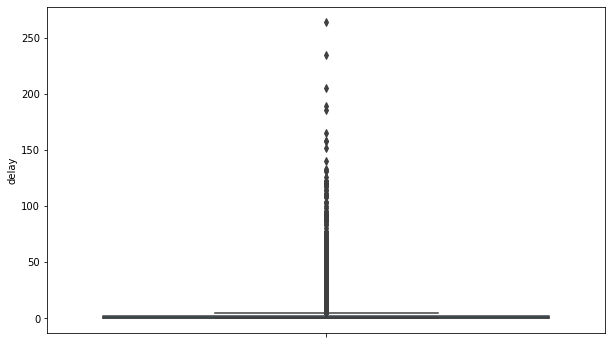

In [822]:
plt.figure(figsize=(10,6))
sns.boxplot(y='delay', data=X_train_and_validation)

In [823]:
X_train_and_validation.drop(X_train_and_validation.index[X_train_and_validation.delay > 200 ], inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [824]:
X_train_and_validation.shape

(46618, 17)

In [825]:
X_test.shape

(3233, 17)

In [826]:
y_test=X_test.delay

In [827]:
X_test.drop(columns=['delay'],inplace=True)

In [828]:
X_test.shape

(3233, 16)

In [829]:
y_test.shape

(3233,)

In [830]:
X_train_and_validation.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,Region,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR us,2019-05-15,2019.0,1.929261e+09,2019-05-05,2019-05-05,2019-05-05,2019-05-20,1,1,6532.60000,2019-05-05,NAH4,0,0.0
1,U001,0200769623,WAL-MAR,2019-10-22,2019.0,1.929996e+09,2019-10-12,2019-10-10,2019-10-12,2019-10-27,1,1,9890.75000,2019-10-12,NAH4,0,0.0
2,CA02,0140104429,COSTCO foundation,2019-04-04,2019.0,2.960536e+09,2019-03-23,2019-03-23,2019-03-23,2019-04-03,0,1,57129.29729,2019-03-24,CA10,0,1.0
3,U001,0200769623,WAL-MAR corp,2019-12-10,2019.0,1.930203e+09,2019-11-27,2019-11-27,2019-11-27,2019-12-12,1,1,12219.74000,2019-11-27,NAH4,0,0.0
4,U001,0200769623,WAL-MAR corp,2019-07-08,2019.0,1.929540e+09,2019-06-27,2019-06-25,2019-06-27,2019-07-12,1,1,1897.50000,2019-06-27,NAH4,0,0.0


In [831]:
X=X_train_and_validation.copy()

In [832]:
X.drop(columns=['delay'],inplace=True)

In [833]:
y=X_train_and_validation['delay']

In [834]:
X_train ,X_validation , y_train , y_validation = train_test_split(X , y ,test_size=.3,shuffle=False,random_state=42)

In [835]:
X_train.shape

(32632, 16)

In [836]:
X_validation.shape

(13986, 16)

In [837]:
X_test.shape

(3233, 16)

Train Test Split Completed

Dropping isOpen Column as split is already done and now it is of no use

In [838]:
X_train.drop(columns=['isOpen'],inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [839]:
X_validation.drop(columns=['isOpen'],inplace=True)

In [840]:
X_test.drop(columns=['isOpen'],inplace=True)

Checking whether posting date and document_create_date.1 are same or not

In [841]:
X_train.index[X_train['posting_date']!=X_train['document_create_date.1']]

Int64Index([], dtype='int64')

In [842]:
X_validation.index[X_validation['posting_date']!=X_validation['document_create_date.1']]

Int64Index([], dtype='int64')

In [843]:
X_test.index[X_test['posting_date']!=X_test['document_create_date.1']]

Int64Index([], dtype='int64')

Dropping posting date and document_create_date and baseline_create_date

In [844]:
X_train.drop(columns=['posting_date'],inplace=True)

In [845]:
X_train.drop(columns=['document_create_date','baseline_create_date'],inplace=True)

In [846]:
X_validation.drop(columns=['posting_date'],inplace=True)

In [847]:
X_validation.drop(columns=['document_create_date','baseline_create_date'],inplace=True)

In [848]:
X_test.drop(columns=['posting_date'],inplace=True)

In [849]:
X_test.drop(columns=['document_create_date','baseline_create_date'],inplace=True)

Splitting document_create_date.1 and due_in_date into days month and year

In [850]:
X_train['doc_create_day']=X_train['document_create_date.1'].dt.day
X_train['doc_create_months']=X_train['document_create_date.1'].dt.month
X_train['doc_create_year']=X_train['document_create_date.1'].dt.year

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [851]:
X_validation['doc_create_day']=X_validation['document_create_date.1'].dt.day
X_validation['doc_create_months']=X_validation['document_create_date.1'].dt.month
X_validation['doc_create_year']=X_validation['document_create_date.1'].dt.year

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [852]:
X_test['doc_create_day']=X_test['document_create_date.1'].dt.day
X_test['doc_create_months']=X_test['document_create_date.1'].dt.month
X_test['doc_create_year']=X_test['document_create_date.1'].dt.year

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [853]:
X_train['due_in_date_day']=X_train['due_in_date'].dt.day
X_train['due_in_date_month']=X_train['due_in_date'].dt.month
X_train['due_in_date_year']=X_train['due_in_date'].dt.year

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [854]:
X_validation['due_in_date_day']=X_validation['due_in_date'].dt.day
X_validation['due_in_date_month']=X_validation['due_in_date'].dt.month
X_validation['due_in_date_year']=X_validation['due_in_date'].dt.year

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [855]:
X_test['due_in_date_day']=X_test['due_in_date'].dt.day
X_test['due_in_date_month']=X_test['due_in_date'].dt.month
X_test['due_in_date_year']=X_test['due_in_date'].dt.year

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [856]:
X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,Region,document type,total_open_amount,cust_payment_terms,doc_create_day,doc_create_months,doc_create_year,due_in_date_day,due_in_date_month,due_in_date_year
0,U001,0200769623,WAL-MAR us,2019-05-15,2019.0,1.929261e+09,2019-05-05,2019-05-20,1,1,6532.60000,NAH4,5,5,2019,20,5,2019
1,U001,0200769623,WAL-MAR,2019-10-22,2019.0,1.929996e+09,2019-10-12,2019-10-27,1,1,9890.75000,NAH4,12,10,2019,27,10,2019
2,CA02,0140104429,COSTCO foundation,2019-04-04,2019.0,2.960536e+09,2019-03-23,2019-04-03,0,1,57129.29729,CA10,23,3,2019,3,4,2019
3,U001,0200769623,WAL-MAR corp,2019-12-10,2019.0,1.930203e+09,2019-11-27,2019-12-12,1,1,12219.74000,NAH4,27,11,2019,12,12,2019
4,U001,0200769623,WAL-MAR corp,2019-07-08,2019.0,1.929540e+09,2019-06-27,2019-07-12,1,1,1897.50000,NAH4,27,6,2019,12,7,2019


Dropping doc_id,document_create_date.1,due_in_date,buisness_year,clear_date

In [857]:
X_train.drop(columns=['doc_id','document_create_date.1','due_in_date','buisness_year','clear_date'],inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [858]:
X_validation.drop(columns=['doc_id','document_create_date.1','due_in_date','buisness_year','clear_date'],inplace=True)

In [859]:
X_test.drop(columns=['doc_id','document_create_date.1','due_in_date','buisness_year','clear_date'],inplace=True)

In [860]:
X_train.head()

,business_code,cust_number,name_customer,Region,document type,total_open_amount,cust_payment_terms,doc_create_day,doc_create_months,doc_create_year,due_in_date_day,due_in_date_month,due_in_date_year
0,U001,0200769623,WAL-MAR us,1,1,6532.60000,NAH4,5,5,2019,20,5,2019
1,U001,0200769623,WAL-MAR,1,1,9890.75000,NAH4,12,10,2019,27,10,2019
2,CA02,0140104429,COSTCO foundation,0,1,57129.29729,CA10,23,3,2019,3,4,2019
3,U001,0200769623,WAL-MAR corp,1,1,12219.74000,NAH4,27,11,2019,12,12,2019
4,U001,0200769623,WAL-MAR corp,1,1,1897.50000,NAH4,27,6,2019,12,7,2019


In [861]:
X_train.drop(columns=['document type'],inplace=True)
X_validation.drop(columns=['document type'],inplace=True)
X_test.drop(columns=['document type'],inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Label Encoding cust_payment_terms

In [862]:
a=df.cust_payment_terms.unique()

In [863]:
a

array(['NAH4', 'CA10', 'NAAX', 'NAM4', 'NAA8', 'NAX2', 'NAM2', 'NAC6',
       'NAU5', 'NAAW', 'NAUZ', 'NAD1', 'NA10', 'NAVD', 'NAVR', 'NAG2',
       'NAVM', 'NAVQ', 'NA32', 'NAGD', 'NAVF', 'NABG', 'NAVL', 'NAM1',
       'NAWN', 'NAWU', 'NAVE', 'CA30', 'NAD5', 'B112', 'NA8Q', 'NAWP',
       'NATX', 'C106', 'NAD4', 'NAUP', 'NAD8', 'NATL', 'NACB', 'NATU',
       'NA3F', 'NA3B', 'NATK', 'NAUY', 'NA84', 'NAB1', 'NAUI', 'NA38',
       'NA9X', 'BR56', 'NAWM', 'NATM', 'CAX2', 'NATW', 'NATZ', 'NA31',
       '90M7', 'NAVC', 'NA25', 'NACE', 'C129', 'NATJ', 'B052', 'NAV9',
       'B030', 'NAV2', 'NATH', 'NAUX', 'NANC', 'CAB1', 'NAM3', 'NAUW',
       'NATV', 'NACH'], dtype=object)

In [864]:
l=len(a)

In [865]:
list=[ i for i in range(1,l+1)]
list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74]

In [866]:
d1=dict(zip(a,list))

In [867]:
d1

{'NAH4': 1,
 'CA10': 2,
 'NAAX': 3,
 'NAM4': 4,
 'NAA8': 5,
 'NAX2': 6,
 'NAM2': 7,
 'NAC6': 8,
 'NAU5': 9,
 'NAAW': 10,
 'NAUZ': 11,
 'NAD1': 12,
 'NA10': 13,
 'NAVD': 14,
 'NAVR': 15,
 'NAG2': 16,
 'NAVM': 17,
 'NAVQ': 18,
 'NA32': 19,
 'NAGD': 20,
 'NAVF': 21,
 'NABG': 22,
 'NAVL': 23,
 'NAM1': 24,
 'NAWN': 25,
 'NAWU': 26,
 'NAVE': 27,
 'CA30': 28,
 'NAD5': 29,
 'B112': 30,
 'NA8Q': 31,
 'NAWP': 32,
 'NATX': 33,
 'C106': 34,
 'NAD4': 35,
 'NAUP': 36,
 'NAD8': 37,
 'NATL': 38,
 'NACB': 39,
 'NATU': 40,
 'NA3F': 41,
 'NA3B': 42,
 'NATK': 43,
 'NAUY': 44,
 'NA84': 45,
 'NAB1': 46,
 'NAUI': 47,
 'NA38': 48,
 'NA9X': 49,
 'BR56': 50,
 'NAWM': 51,
 'NATM': 52,
 'CAX2': 53,
 'NATW': 54,
 'NATZ': 55,
 'NA31': 56,
 '90M7': 57,
 'NAVC': 58,
 'NA25': 59,
 'NACE': 60,
 'C129': 61,
 'NATJ': 62,
 'B052': 63,
 'NAV9': 64,
 'B030': 65,
 'NAV2': 66,
 'NATH': 67,
 'NAUX': 68,
 'NANC': 69,
 'CAB1': 70,
 'NAM3': 71,
 'NAUW': 72,
 'NATV': 73,
 'NACH': 74}

Label Encoding X_train

In [868]:
X_train['cust_payment_terms'].replace(d1, inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Label Encoding X_validation

In [869]:
X_validation['cust_payment_terms'].replace(d1, inplace=True)

Label Encoding X_test

In [870]:
X_test['cust_payment_terms'].replace(d1, inplace=True)

Label Encoding on cust_payment_terms is complete

In [871]:
X_train.head()

,business_code,cust_number,name_customer,Region,total_open_amount,cust_payment_terms,doc_create_day,doc_create_months,doc_create_year,due_in_date_day,due_in_date_month,due_in_date_year
0,U001,0200769623,WAL-MAR us,1,6532.60000,1,5,5,2019,20,5,2019
1,U001,0200769623,WAL-MAR,1,9890.75000,1,12,10,2019,27,10,2019
2,CA02,0140104429,COSTCO foundation,0,57129.29729,2,23,3,2019,3,4,2019
3,U001,0200769623,WAL-MAR corp,1,12219.74000,1,27,11,2019,12,12,2019
4,U001,0200769623,WAL-MAR corp,1,1897.50000,1,27,6,2019,12,7,2019


Label Encoding Business Code

In [872]:
a=df.business_code.unique()

In [873]:
a

array(['U001', 'CA02', 'U013', 'U002', 'U005'], dtype=object)

In [874]:
l=len(a)

In [875]:
list=[ i for i in range(1,l+1)]
list

[1, 2, 3, 4, 5]

In [876]:
d1=dict(zip(a,list))

In [877]:
d1

{'U001': 1, 'CA02': 2, 'U013': 3, 'U002': 4, 'U005': 5}

Label Encoding cust_payment_terms in X_train

In [878]:
X_train['business_code'].replace(d1, inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Label Encoding cust_payment_terms in X_validation

In [879]:
X_validation['business_code'].replace(d1, inplace=True)

Label Encoding cust_payment_terms in X_test

In [880]:
X_test['business_code'].replace(d1, inplace=True)

In [881]:
X_train.head()

,business_code,cust_number,name_customer,Region,total_open_amount,cust_payment_terms,doc_create_day,doc_create_months,doc_create_year,due_in_date_day,due_in_date_month,due_in_date_year
0,1,0200769623,WAL-MAR us,1,6532.60000,1,5,5,2019,20,5,2019
1,1,0200769623,WAL-MAR,1,9890.75000,1,12,10,2019,27,10,2019
2,2,0140104429,COSTCO foundation,0,57129.29729,2,23,3,2019,3,4,2019
3,1,0200769623,WAL-MAR corp,1,12219.74000,1,27,11,2019,12,12,2019
4,1,0200769623,WAL-MAR corp,1,1897.50000,1,27,6,2019,12,7,2019


Label Encoding cust_number

In [882]:
a=df.cust_number.unique()

In [883]:
a

array(['0200769623', '0140104429', '0200794332', ..., '0100033130',
       '0200789896', '200657619'], dtype=object)

In [884]:
l=len(a)

In [885]:
list=[ i for i in range(1,l+1)]

In [886]:
d1=dict(zip(a,list))

Label Encoding cust_number in X_train

In [887]:
X_train['cust_number'].replace(d1, inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Label Encoding cust_number in X_validation

In [888]:
X_validation['cust_number'].replace(d1, inplace=True)

Label Encoding cust_number in X_test

In [889]:
X_test['cust_number'].replace(d1, inplace=True)

Label Encoding name_customer

In [890]:
a=df.name_customer.unique()

In [891]:
l=len(a)

In [892]:
list=[ i for i in range(1,l+1)]

In [893]:
d1=dict(zip(a,list))

Label Encoding name_customer in X_train

In [894]:
X_train['name_customer'].replace(d1, inplace=True)

Label Encoding name_customer in X_validation

In [895]:
X_validation['name_customer'].replace(d1, inplace=True)

Label Encoding name_customer in X_test

In [896]:
X_test['name_customer'].replace(d1, inplace=True)

In [897]:
X_train.head()

,business_code,cust_number,name_customer,Region,total_open_amount,cust_payment_terms,doc_create_day,doc_create_months,doc_create_year,due_in_date_day,due_in_date_month,due_in_date_year
0,1,1,1,1,6532.60000,1,5,5,2019,20,5,2019
1,1,1,2,1,9890.75000,1,12,10,2019,27,10,2019
2,2,2,3,0,57129.29729,2,23,3,2019,3,4,2019
3,1,1,4,1,12219.74000,1,27,11,2019,12,12,2019
4,1,1,4,1,1897.50000,1,27,6,2019,12,7,2019


<AxesSubplot:xlabel='doc_id', ylabel='delay'>

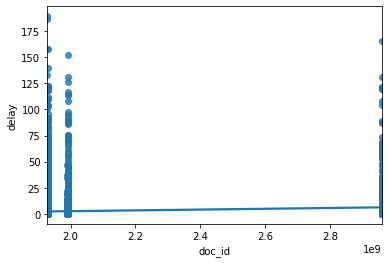

In [898]:
sns.regplot(x="doc_id",y="delay", data=X_train_and_validation)

Machine Learning Model

In [899]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [900]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_auc_score,recall_score,classification_report
from sklearn.metrics import accuracy_score,f1_score,precision_score

In [901]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Decision Tree

In [902]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [903]:
pred = model.predict(X_validation)

In [904]:
acc3 = accuracy_score(y_validation,pred)

In [905]:
print("The accuracy score is :",acc3)

The accuracy score is : 0.47847847847847846


In [906]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_validation,pred)

83.96517946517946

Random Forest

In [908]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_validation)
acc2 = accuracy_score(y_validation,pred)
print("The accuracy score is :",acc2)

The accuracy score is : 0.6098956098956099


In [909]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_validation,pred)

56.31917631917632

In [923]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2) 
# Training the model 
extra_tree_forest.fit(X_train, y_train) 

# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],axis=0) 

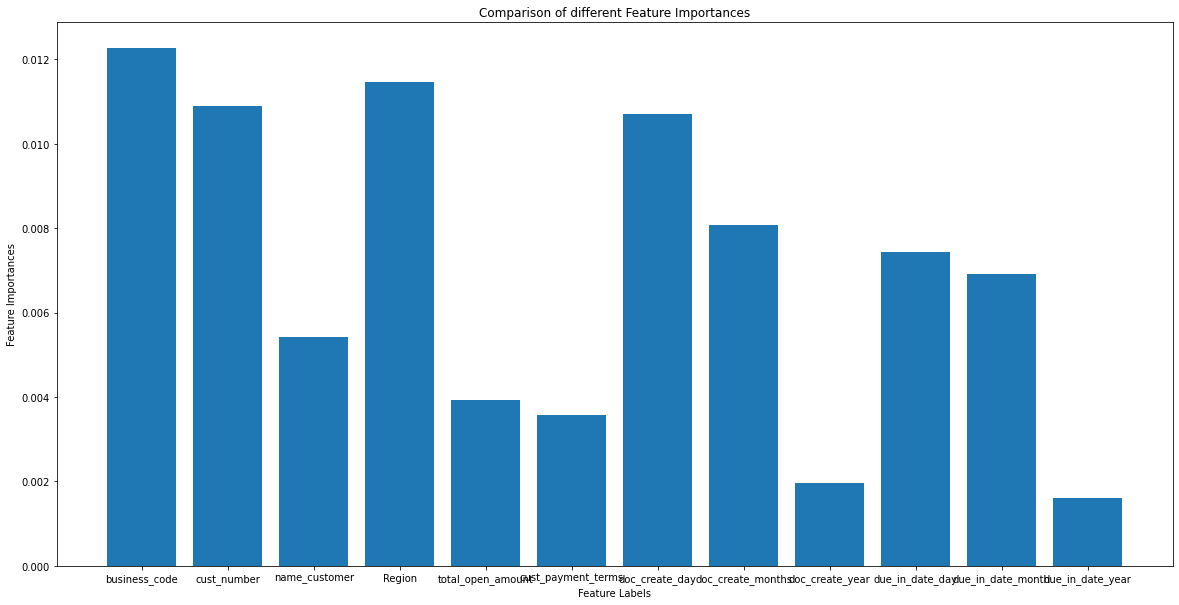

In [932]:
plt.figure(figsize=(20,10))
plt.bar(X_train.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()